# ***K-Means***

## **Penjelasan Algoritma K-Means**

K-means adalah suatu algoritma yang biasanya dipakai oleh suatu program untuk membagi data kedalam beberapa kelompok berdasarkan kemiripan yang ada pada suatu data. Algoritma ini cukup populer penggunaanya dalam program mechine learning. K-means juga adalah suatu algoritma yang pengelompokannya berbasis centroid berulang yang mempartisi kumpulan data menjadi kelompok yang serupa berdasarkan jarak dari centroid datanya. 


## **Cara Kerja K-Means**
Algoritma ini biasanya menggunakan titik data dimana biasanya diukur antar data satu dan yang lainya dengan perhitungan matematis seperti perhitungan Euclidean, dari titik pusat clusternya. Tujuannya adalah meminimalkan perbedaan dari setiap anggota data, dan memaksimalkan perbedaan antara kelompok atau cluster yang sudah ditentukan. Jadi titik data yang dekat dengan titik pusat atau centroid akan berdekatan dengan kelompok atau clusternya dan yang berbeda akan semakin jauh jarak antar datanya. 

Biasanya tahap pertama dari prosesnya adalah dengan menentukan salah satu data menjadi pusat kelompok atau clusteringnya, lalu diukurlah jarak antar datanya dengan menggunakan perhitungan matematis seperti Euclidean. Biasanya proses ini tidak hanya dilakukan hanya satu dua kali, akan tetapi dilakukan berulang kali sampai hasil perhitungan nilai mean atau nilai tengah tidak berubah lagi, atau titik datanya tidak mengalami perpindahan lagi. 

Algoritma ini bisa dibilang cukup sederhana dibandingkan dengan algoritma yang lain akan tetapi, karena algoritma ini cukup sederhana maka proses pengolahan datanya bisa dibilang cukup sensitif pada suatu data yang outlier. Mungkin ini adalah salah satu kelemahan dari penggunaan algoritma K-means ini. 

## **Evaluasi Jumlah Cluster**

Setelah dilakukannya pengelompokan dan juga perhitungan pada data, proses pengolahan data tidak berhenti sampai disana saja. Selanjutnya adalah proses analisa hasil dari jumlah kelompok yang sudah ditentukan sebelum mengelompokkan data. Jadi pada prosesnya tidak hanya sekedar mengelompokkan data ada dibagian kelompok mana, akan tetapi juga dilakukan proses evaluasi untuk menentukan berapa kelompok kira kira yang optimal dan bagus. Evaluasi ini juga memiliki berbagai cara dan juga metoda yang biasanya dipakai. Namun pada penerapannya kali ini saya memilih dua metode yaitu metode silhouette dan SSE (Sum of Squared Error).

## **Implementasi Algoritma K-Means Menggunakan Python**

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [2]:
iris = pd.read_csv("iris.csv")
selected_column = ['petal length', 'petal width', 'sepal length', 'sepal width']
filtered_iris = iris[selected_column]
df_iris = pd.DataFrame(filtered_iris)

In [3]:
print(df_iris)

     petal length  petal width  sepal length  sepal width
0             1.4          0.2           5.1          3.5
1             1.4          0.2           4.9          3.0
2             1.3          0.2           4.7          3.2
3             1.5          0.2           4.6          3.1
4             1.4          0.2           5.0          3.6
..            ...          ...           ...          ...
145           5.2          2.3           6.7          3.0
146           5.0          1.9           6.3          2.5
147           5.2          2.0           6.5          3.0
148           5.4          2.3           6.2          3.4
149           5.1          1.8           5.9          3.0

[150 rows x 4 columns]


Jumlah Cluster: 2
  SSE: 152.36870647733903
  Silhouette Score: 0.6808136202936811

Jumlah Cluster: 3
  SSE: 78.9450658259773
  Silhouette Score: 0.5509643746707433

Jumlah Cluster: 4
  SSE: 57.44028021295474
  Silhouette Score: 0.4974115445023611



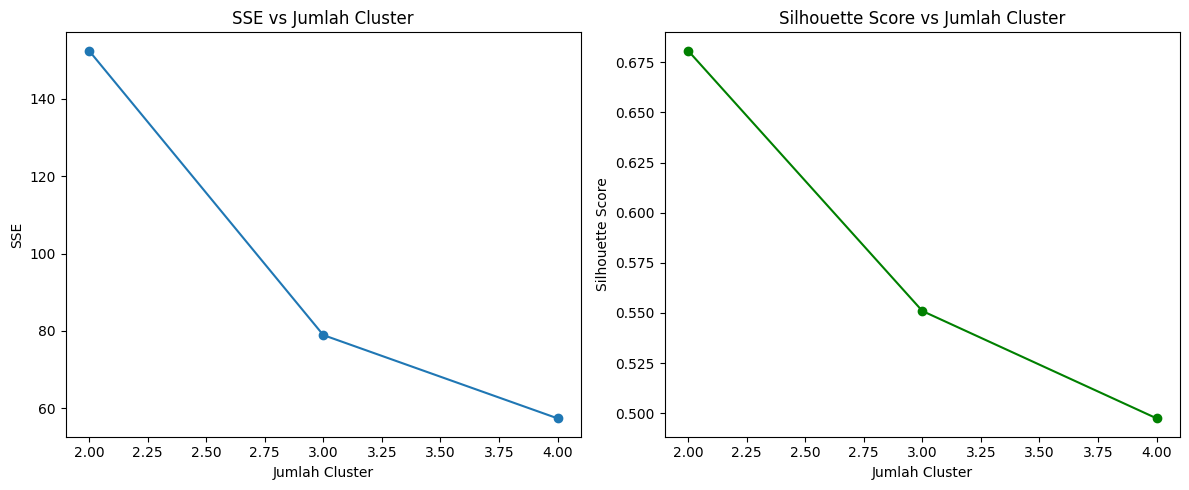

In [4]:
# Simpan hasil untuk SSE dan Silhouette
sse = []
silhouette = []

# Coba jumlah cluster dari 2 sampai 4
for k in range(2, 5):
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=350)
    cluster_labels = kmeans.fit_predict(df_iris)

    sse.append(kmeans.inertia_)  # SSE
    silhouette.append(silhouette_score(df_iris, cluster_labels))  # Silhouette

# Tampilkan hasil
for i, k in enumerate(range(2, 5)):
    print(f"Jumlah Cluster: {k}")
    print(f"  SSE: {sse[i]}")
    print(f"  Silhouette Score: {silhouette[i]}\n")

# Visualisasi
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(2, 5), sse, marker='o')
plt.title('SSE vs Jumlah Cluster')
plt.xlabel('Jumlah Cluster')
plt.ylabel('SSE')

plt.subplot(1, 2, 2)
plt.plot(range(2, 5), silhouette, marker='o', color='green')
plt.title('Silhouette Score vs Jumlah Cluster')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()
